# Speed comparison: sparse.svds to sparse.eigsh

In [27]:
from time import time
import numpy as np
from scipy.sparse.linalg import svds, eigsh
from scipy.stats import beta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from graspologic.simulations import sbm
from graspologic.plot import heatmap

In [16]:
def make_community(a, b, n=500):
    return beta.rvs(a, b, size=(n, 5))

def gen_covariates(n):
    c1 = make_community(2, 5, n=n)
    c2 = make_community(2, 2, n=n)

    covariates = np.vstack((c1, c2))
    return covariates

def gen_network(n):
    P = np.array([[.08, .02], [.02, .08]])
    A = sbm([n//2, n//2], P)
    Y = gen_covariates(n=n//2)
    return A, Y

In [ ]:
nodes = np.geomspace(100, 10000, 40).astype(int)
nodes[nodes % 2 == 1] += 1
n_components = 1

svds_time = {}
eigsh_time = {}
for n in nodes:
    A, _ = gen_network(n)
    
    # svds
    start = time()
    U, D, V = svds(A, k=n_components)
    svds_time[n] = time() - start
    
    # eigsh
    start = time()
    D_, U_ = eigsh(A, k=n_components)
    D = np.abs(D)
    eigsh_time[n] = time() - start
    
times = svds_time.copy()
df = pd.DataFrame(times.values(), index=times.keys(), columns=["SVD"])
df.reset_index(inplace=True)

df["eigsh"] = eigsh_time.values()
melted = pd.melt(df, id_vars="index")
melted.rename(columns={"index": "nodes", "variable": "SVD Type", "value": "time (s)"},
              inplace=True)
melted.head()
ax = sns.lineplot(data=melted, x="nodes", y="time (s)", hue="SVD Type")
ax.set(title=f"Speed comparison of svds compared to eigsh (n_components={n_components})")

plt.savefig(f"../figs/svd_speeds_{n_components}_comp.png", bbox_inches="tight")

In [28]:
nodes = np.geomspace(100, 10000, 40).astype(int)
nodes[nodes % 2 == 1] += 1
n_components = 2

svds_time = {}
eigsh_time = {}
for n in nodes:
    A, _ = gen_network(n)
    
    # svds
    start = time()
    U, D, V = svds(A, k=n_components)
    svds_time[n] = time() - start
    
    # eigsh
    start = time()
    D_, U_ = eigsh(A, k=n_components)
    D = np.abs(D)
    eigsh_time[n] = time() - start

times = svds_time.copy()
df = pd.DataFrame(times.values(), index=times.keys(), columns=["SVD"])
df.reset_index(inplace=True)

df["eigsh"] = eigsh_time.values()
melted = pd.melt(df, id_vars="index")
melted.rename(columns={"index": "nodes", "variable": "SVD Type", "value": "time (s)"},
              inplace=True)
melted.head()
ax = sns.lineplot(data=melted, x="nodes", y="time (s)", hue="SVD Type")
ax.set(title=r"Speed comparison of svds compared to eigsh (n_components=2)")

plt.savefig("../figs/svd_speeds_2comp.png", bbox_inches="tight")

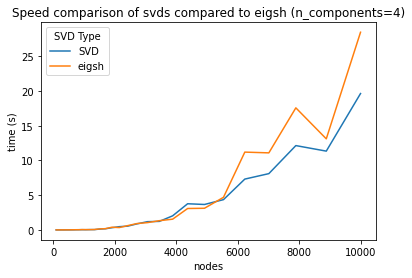

In [29]:
nodes = np.geomspace(100, 10000, 40).astype(int)
nodes[nodes % 2 == 1] += 1
n_components = 4

svds_time = {}
eigsh_time = {}
for n in nodes:
    A, _ = gen_network(n)
    
    # svds
    start = time()
    U, D, V = svds(A, k=n_components)
    svds_time[n] = time() - start
    
    # eigsh
    start = time()
    D_, U_ = eigsh(A, k=n_components)
    D = np.abs(D)
    eigsh_time[n] = time() - start
    
times = svds_time.copy()
df = pd.DataFrame(times.values(), index=times.keys(), columns=["SVD"])
df.reset_index(inplace=True)

df["eigsh"] = eigsh_time.values()
melted = pd.melt(df, id_vars="index")
melted.rename(columns={"index": "nodes", "variable": "SVD Type", "value": "time (s)"},
              inplace=True)
melted.head()
ax = sns.lineplot(data=melted, x="nodes", y="time (s)", hue="SVD Type")
ax.set(title=f"Speed comparison of svds compared to eigsh (n_components={n_components})")

plt.savefig(f"../figs/svd_speeds_{n_components}_comp.png", bbox_inches="tight")

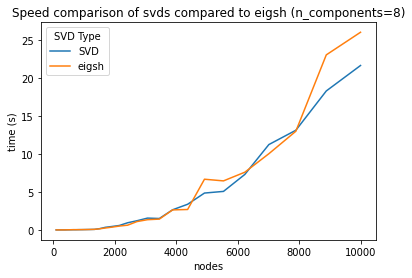

In [30]:
nodes = np.geomspace(100, 10000, 40).astype(int)
nodes[nodes % 2 == 1] += 1
n_components = 8

svds_time = {}
eigsh_time = {}
for n in nodes:
    A, _ = gen_network(n)
    
    # svds
    start = time()
    U, D, V = svds(A, k=n_components)
    svds_time[n] = time() - start
    
    # eigsh
    start = time()
    D_, U_ = eigsh(A, k=n_components)
    D = np.abs(D)
    eigsh_time[n] = time() - start
    
times = svds_time.copy()
df = pd.DataFrame(times.values(), index=times.keys(), columns=["SVD"])
df.reset_index(inplace=True)

df["eigsh"] = eigsh_time.values()
melted = pd.melt(df, id_vars="index")
melted.rename(columns={"index": "nodes", "variable": "SVD Type", "value": "time (s)"},
              inplace=True)
melted.head()
ax = sns.lineplot(data=melted, x="nodes", y="time (s)", hue="SVD Type")
ax.set(title=f"Speed comparison of svds compared to eigsh (n_components={n_components})")

plt.savefig(f"../figs/svd_speeds_{n_components}_comp.png", bbox_inches="tight")

In [ ]:
nodes = np.geomspace(100, 10000, 40).astype(int)
nodes[nodes % 2 == 1] += 1
n_components = 16

svds_time = {}
eigsh_time = {}
for n in nodes:
    A, _ = gen_network(n)
    
    # svds
    start = time()
    U, D, V = svds(A, k=n_components)
    svds_time[n] = time() - start
    
    # eigsh
    start = time()
    D_, U_ = eigsh(A, k=n_components)
    D = np.abs(D)
    eigsh_time[n] = time() - start
    
times = svds_time.copy()
df = pd.DataFrame(times.values(), index=times.keys(), columns=["SVD"])
df.reset_index(inplace=True)

df["eigsh"] = eigsh_time.values()
melted = pd.melt(df, id_vars="index")
melted.rename(columns={"index": "nodes", "variable": "SVD Type", "value": "time (s)"},
              inplace=True)
melted.head()
ax = sns.lineplot(data=melted, x="nodes", y="time (s)", hue="SVD Type")
ax.set(title=f"Speed comparison of svds compared to eigsh (n_components={n_components})")

plt.savefig(f"../figs/svd_speeds_{n_components}_comp.png", bbox_inches="tight")